In [51]:
class StreamingMeanAndVariance:
    def __init__(self):
        self.mean = 0
        self.variance = 0
        self.n_elements = 0

    def update(self, element):
        self.variance = ((self.variance + self.mean ** 2) * self.n_elements + element ** 2) / (self.n_elements + 1)
        self.mean = ((self.mean * self.n_elements) + element) / (self.n_elements + 1)
        self.variance = self.variance - self.mean ** 2
        self.n_elements += 1

In [6]:
from collections import deque
        
class StreamingOutlier:
    def __init__(self, max_k):
        self.max_k = max_k
        self.mean = 0
        self.n_sum = 0
        self.variance = 0
        self.queue = deque(maxlen=self.max_k)
        self.n_elements = 0
        
    def _update_queue_full(self, element):
        old_mean = self.mean 
        first_element = self.queue.popleft()
        
        self.n_sum += element - first_element
        self.mean = self.n_sum / len(self.queue)
        self.variance = (self.variance + (old_mean ** 2 - self.mean ** 2)) + ((element ** 2 - first_element ** 2)/self.max_k)
        self.queue.append(element)
        self.n_elements += 1

        
    def _update_queue_not_full(self, element):
        self.variance = ((self.variance + self.mean ** 2) * self.n_elements + element ** 2) / (self.n_elements + 1)
        self.mean = ((self.mean * self.n_elements) + element) / (self.n_elements + 1)
        self.variance = self.variance - self.mean ** 2
        self.n_elements += 1
        self.n_sum += element
        self.queue.append(element)
        
    def update(self, element):
        if len(self.queue) == self.max_k:
            self._update_queue_full(element)
        else:
            self._update_queue_not_full(element)

In [7]:
import numpy as np

m = StreamingOutlier(1000)
# m = StreamingMeanAndVariance()
n = 10000

numbers = {
    "nums": list(),
    "means": list(),
    "variances": list(),
    "outlier_index": list(),
}

for i in range(n):
#     s = np.random.normal(0, 1)
    if i < 1000:
        s = np.random.normal(0, 1)
    elif 1000 < i < 5000:
        s = np.random.normal(2, 1)
    else:
        s = np.random.normal(-2, 1)
    if not -3 <= (s - m.mean) / np.sqrt(m.variance) <= 3:
        numbers["outlier_index"].append(i)

    m.update(s)
    numbers["nums"].append(s)
    numbers["means"].append(m.mean)
    numbers["variances"].append(np.sqrt(m.variance))

/Users/siddheshpisal/.pyenv/versions/3.6.7/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


In [8]:
print(m.mean, m.variance, m.n_elements)

-2.0177520945979883 1.0087494788003586 10000


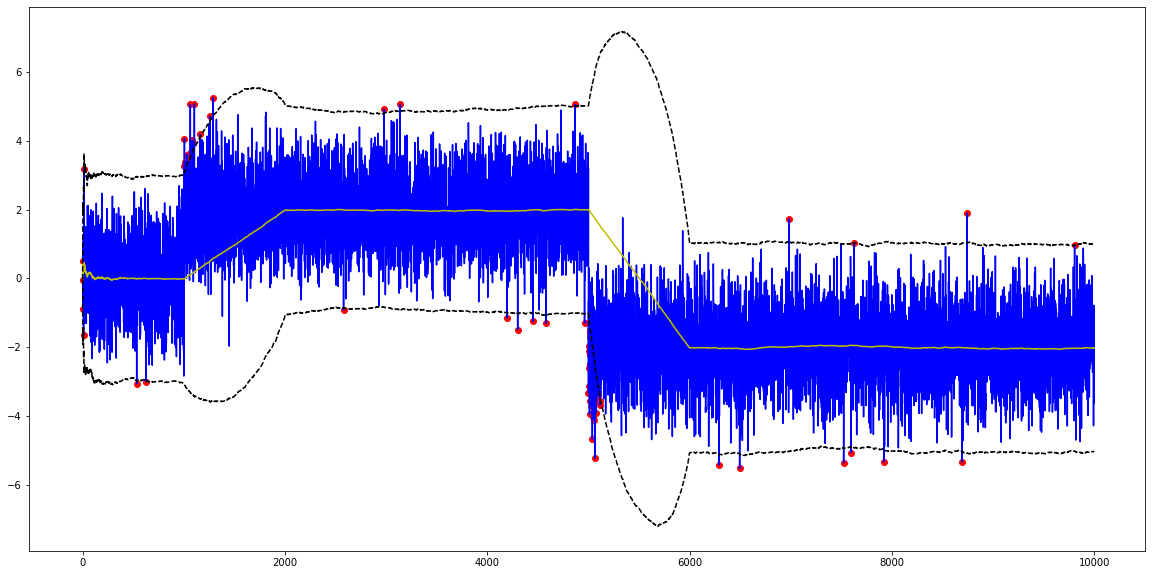

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(np.array(numbers["nums"]), '-b', label='Numbers')
plt.plot(np.array(numbers["means"]), '-y', label='Means')
plt.plot(np.array(numbers["means"]) + (3*np.array(numbers["variances"])), '--k', label='Variance')
plt.plot(np.array(numbers["means"]) - (3*np.array(numbers["variances"])), '--k', label='Variance')
plt.scatter(np.array(numbers["outlier_index"]), np.array(numbers["nums"])[np.ix_(numbers["outlier_index"])], c="r")

array([1., 1., 1.])